# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD


In [11]:
if os.name=='nt':
    !pip install wget

In [29]:
import wget

In [22]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  16% (506/3011)
Updating files:  17% (512/3011)
Updating files:  18% (542/3011)
Updating files:  19% (573/3011)
Updating files:  20% (603/3011)
Updating files:  21% (633/3011)
Updating files:  22% (663/3011)
Updating files:  23% (693/3011)
Updating files:  24% (723/3011)
Updating files:  25% (753/3011)
Updating files:  25% (770/3011)
Updating files:  26% (783/3011)
Updating files:  27% (813/3011)
Updating files:  28% (844/3011)
Updating files:  29% (874/3011)
Updating files:  30% (904/3011)
Updating files:  31% (934/3011)
Updating files:  32% (964/3011)
Updating files:  33% (994/3011)
Updating files:  34% (1024/3011)
Updating files:  35% (1054/3011)
Updating files:  36% (1084/3011)
Updating files:  37% (1115/3011)
Updating files:  38% (1145/3011)
Updating files:  39% (1175/3011)
Updating files:  40% (1205/3011)
Updating files:  41% (1235/3011)
Updating files:  42% (1265/3011)
Updating files:  43% (1295/3011)
Updating files:  44% (1325

In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.19.4/protoc-3.19.4-win64.zip"
    wget.download(url)
    !move protoc-3.19.4-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.19.4-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1524659 / 1524659        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
Traceback (most recent call last):
  File "E:\Tensorflow Object Detection\TFOD\newenv\lib\site-packages\setuptools\sandbox.py", line 156, in save_modules
    yield saved
  File "E:\Tensorflow Object Detection\TFOD\newenv\lib\site-packages\setuptools\sandbox.py", line 198, in setup_context
    yield
  File "E:\Tensorflow Object Detection\TFOD\newenv\lib\site-packages\setuptools\sandbox.py", line 259, in run_setup
    _execfile(setup_script, ns)
  File "E:\Tensorflow Object Detection\TFOD\newenv\lib\site-packages\setuptools\sandbox.py", line 46, in _execfile
    exec(code, globals, locals)
  File "C:\Users\user\AppData\Local\Temp\easy_install-c2r4xj3a\pandas-

copying build\lib\object_detection\builders\hyperparams_builder_test.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\image_resizer_builder.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\image_resizer_builder_test.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\input_reader_builder.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\input_reader_builder_tf1_test.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\losses_builder.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\losses_builder_test.py -> build\bdist.win-amd64\egg\object_detection\builders
copying build\lib\object_detection\builders\matcher_builder.py -> build\bdist.win-amd64\egg\object_detection\builders
copying 

byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_resnet_v1_ppn_feature_extractor.py to ssd_resnet_v1_ppn_feature_extractor.cpython-310.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_resnet_v1_ppn_feature_extractor_testbase.py to ssd_resnet_v1_ppn_feature_extractor_testbase.cpython-310.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_resnet_v1_ppn_feature_extractor_tf1_test.py to ssd_resnet_v1_ppn_feature_extractor_tf1_test.cpython-310.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_spaghettinet_feature_extractor.py to ssd_spaghettinet_feature_extractor.cpython-310.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_spaghettinet_feature_extractor_tf1_test.py to ssd_spaghettinet_feature_extractor_tf1_test.cpython-310.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\__init__.py to __init__.cpython-310.pyc
byte-compiling build\bdist.win-amd64\egg\object_de

Obtaining file:///E:/Tensorflow%20Object%20Detection/TFOD/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [15]:
!pip install tensorflow --upgrade

In [30]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-04-19 01:36:32.023421: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-19 01:36:32.023600: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-19 01:37:20.581400: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-04-19 01:37:20.594517: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-19 01:37:20.712007: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-RSADG07
2022-04-19 01:37:20.712844: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-RSADG07
Running tests under Python 3.10.2: E:\Tensorflow Object Detection\TFOD\newenv\Scripts\python.exe
[ RUN    

I0419 01:37:58.650673  8372 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet EfficientNet backbone version: efficientnet-b5
I0419 01:37:58.651673  8372 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 288
I0419 01:37:58.651673  8372 ssd_efficientnet_bifpn_feature_extractor.py:148] EfficientDet BiFPN num iterations: 7
I0419 01:37:58.654671  8372 efficientnet_model.py:144] round_filter input=32 output=48
I0419 01:37:58.680655  8372 efficientnet_model.py:144] round_filter input=32 output=48
I0419 01:37:58.680655  8372 efficientnet_model.py:144] round_filter input=16 output=24
I0419 01:37:59.018443  8372 efficientnet_model.py:144] round_filter input=16 output=24
I0419 01:37:59.018443  8372 efficientnet_model.py:144] round_filter input=24 output=40
I0419 01:37:59.753992  8372 efficientnet_model.py:144] round_filter input=24 output=40
I0419 01:37:59.754991  8372 efficientnet_model.py:144] round_filter input=40 output=64
I0419 01:38:00.587253  8372

In [18]:
pip install pyyaml

  Using cached PyYAML-6.0-cp310-cp310-win_amd64.whl (151 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires Cython, which is not installed.
tf-models-official 2.8.0 requires gin-config, which is not installed.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.8.0 requires oauth2client, which is not installed.
tf-models-official 2.8.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.8.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.8.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.8.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.8.0 requires pycocotools, which is not installed.
tf-models-official 2.8.0 requires sacrebleu, which is not installed.
tf-mode

In [20]:
pip install object_detection

  Using cached avro_python3-1.10.2-py3-none-any.whl
  Using cached apache_beam-2.37.0-py3-none-any.whl
  Using cached Cython-0.29.28-py2.py3-none-any.whl (983 kB)
  Using cached contextlib2-21.6.0-py2.py3-none-any.whl (13 kB)
  Using cached pycocotools-2.0.4-cp310-cp310-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.  Using cached lvis-0.5.3-py3-none-any.whl (14 kB)



  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [22 lines of output]
  E:\Tensorflow Object Detection\TFOD\newenv\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\sentencepiece
  copying src\sentencepiece/__init__.py -> build\lib.win-amd64-3.10\sentencepiece
  copying src\sentencepiece/sentencepiece_model_pb2.py -> build\lib.win-amd64-3.10\sentencepiece
  copying src\sentencepiece/sentencepiece_pb2.py -> build\lib.win-amd64-3.10\sentencepiece
  running build_ext
  building 'sentencepiece._sentencepiece' extension
  creating build\temp.win-amd64-3.10
  creating build\temp.win-amd64-3.10\Release
  creating build

  Using cached pandas-1.4.1-cp310-cp310-win_amd64.whl (10.6 MB)
  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)
  Using cached google_api_python_client-2.42.0-py2.py3-none-any.whl (8.3 MB)
  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached opencv_python_headless-4.5.5.64-cp36-abi3-win_amd64.whl (35.3 MB)
  Using cached psutil-5.9.0-cp310-cp310-win_amd64.whl (245 kB)
  Using cached py_cpuinfo-8.0.0-py3-none-any.whl
  Using cached PyYAML-5.4.1-cp310-cp310-win_amd64.whl
  Using cached sacrebleu-2.0.0-py3-none-any.whl (90 kB)
  Using cached sentencepiece-0.1.96.tar.gz (508 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached seqeval-1.2.2-py3-none-any.whl
  Using cached tensorflow_addons-0.16.1-cp310-cp310-win_amd64.whl (755 kB)
  Using cached tensorflow_datasets-4.5.2-py3-none-any.whl (4.2 MB)
  Using cached tensorflow_hub-0.12.0-py2.py3-non

  E:\Tensorflow Object Detection\TFOD\newenv\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  running install
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\sentencepiece
  copying src\sentencepiece/__init__.py -> build\lib.win-amd64-3.10\sentencepiece
  copying src\sentencepiece/sentencepiece_model_pb2.py -> build\lib.win-amd64-3.10\sentencepiece
  copying src\sentencepiece/sentencepiece_pb2.py -> build\lib.win-amd64-3.10\sentencepiece
  running build_ext
  building 'sentencepiece._sentencepiece' extension
  creating build\temp.win-amd64-3.10
  creating build\temp.win-amd64-3.10\Release
  creating build\temp.win-amd64-3.10\Release\src
  creating build\temp.win-amd64-3.10\Release\src\sentencepiece
  E:\Software\visual studio\VC\Tools\MSVC\14.3

In [21]:
import object_detection

In [25]:
pip list

Package                      Version             Editable project location
---------------------------- ------------------- -------------------------------------------------------------------
absl-py                      1.0.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.0.0
certifi                      2021.10.8
charset-normalizer           2.0.12
colorama                     0.4.4
cycler                       0.11.0
Cython                       0.29.28
debugpy                      1.5.1
decorator                    5.1.1
entrypoints                  0.4
executing                    0.8.3
flatbuffers                  2.0
fonttools                    4.31.1
gast                         0.5.3
gin                          0.1.6
gin-config                   0.5.0
google-auth                  2.6.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.44

In [26]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  4% [...                                                                     ]   901120 / 20515344

 14% [..........                                                              ]  2883584 / 20515344

 25% [..................                                                      ]  5210112 / 20515344

 36% [..........................                                              ]  7503872 / 20515344

 47% [..................................                                      ]  9830400 / 20515344

 57% [.........................................                               ] 11788288 / 20515344

 61% [............................................                            ] 12632064 / 20515344

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [11]:
labels = [{'name':'good', 'id':1}, {'name':'thankyou', 'id':2}, {'name':'yes', 'id':3}, {'name':'no', 'id':4}, {'name':'namaste', 'id':5}, {'name':'iloveyou', 'id':6}, {'name':'excuseme', 'id':7}, {'name':'women', 'id':8}, {'name':'stand', 'id':9},]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [17]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [8]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [16]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [6]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [7]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [8]:
config

{'model': ssd {
   num_classes: 9
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [9]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [12]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [13]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text) 

# 6. Train the model

In [14]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [15]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])


In [16]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


# 7. Evaluate the Model

In [19]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths)

In [20]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir={'WORKSPACE_PATH': 'Tensorflow\\workspace', 'SCRIPTS_PATH': 'Tensorflow\\scripts', 'APIMODEL_PATH': 'Tensorflow\\models', 'ANNOTATION_PATH': 'Tensorflow\\workspace\\annotations', 'IMAGE_PATH': 'Tensorflow\\workspace\\images', 'MODEL_PATH': 'Tensorflow\\workspace\\models', 'PRETRAINED_MODEL_PATH': 'Tensorflow\\workspace\\pre-trained-models', 'CHECKPOINT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet', 'OUTPUT_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\export', 'TFJS_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\tfjsexport', 'TFLITE_PATH': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\tfliteexport', 'PROTOC_PATH': 'Tensorflow\\protoc'}


# 8. Load Train Model From Checkpoint

In [17]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [18]:
#ckpt.restore(os.path.join(CHECKPOINT_PATH, 'ckpt-3')).expect_partial()

In [19]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'E:\Tensorflow Object Detection\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [20]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [22]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'women.d54ee390-af5a-11ec-8c46-f0def1fdc957.jpg')

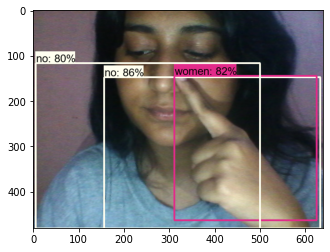

In [23]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [81]:
!pip uninstall opencv-python-headless -y

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
import cv2
cv2.__version__

'4.5.5'

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [32]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [21]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}\".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])"

In [22]:
print(command)

python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])


In [25]:
!{command}

E:\python\python.exe: can't open file 'E:\\Tensorflow Object Detection\\TFOD\\{}': [Errno 2] No such file or directory


# 11. Conversion to TFJS

In [10]:
pip install tensorflowjs

     -------------------------------------- 77.4/77.4 KB 430.4 kB/s eta 0:00:00
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.8.0 requires oauth2client, which is not installed.
tf-models-official 2.8.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.8.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.8.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.8.0 requires sacrebleu, which is not installed.
tf-models-official 2.8.0 requires sentencepiece, which is not installed.
tf-models-official 2.8.0 requires seqeval, which is not installed.
tf-models-official 2.8.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.8.0 requires tensorflow-model-optimization>=0.4.

In [27]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [28]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [29]:
!{command}

2022-04-19 13:17:38.837580: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-19 13:17:38.837833: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Traceback (most recent call last):
  File "E:\python\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "E:\python\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "E:\Tensorflow Object Detection\TFOD\newenv\Scripts\tensorflowjs_converter.exe\__main__.py", line 7, in <module>
  File "E:\Tensorflow Object Detection\TFOD\newenv\lib\site-packages\tensorflowjs\converters\converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "E:\Tensorflow Object Detection\TFOD\newenv\lib\site-packages\tensorflowjs\converters\converter.py", line 817, in main
    convert(argv[0].s

# 12. Conversion to TFLite

In [30]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [31]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [32]:
print(command)


python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [33]:
!{command}

2022-04-19 13:18:11.588191: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-19 13:18:11.588268: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-19 13:18:45.590849: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-04-19 13:18:45.590938: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-19 13:18:45.600424: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-RSADG07
2022-04-19 13:18:45.600735: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-RSADG07
2022-04-19 13:18:45.668003: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is

In [34]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [35]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [36]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [37]:
!{command}

Estimated count of arithmetic ops: 1.731 G  ops, equivalently 0.865 G  MACs


2022-04-19 13:20:34.022151: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-19 13:20:34.022230: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-19 13:20:47.642217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-04-19 13:20:47.642345: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-19 13:20:47.650699: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-RSADG07
2022-04-19 13:20:47.650947: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-RSADG07
2022-04-19 13:20:48.816558: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is

# 13. Zip and Export Models

In [38]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}